# 이원 분산 분석
이원 분산 분석(Two-way ANOVA)은 두 개의 범주형 독립변수(요인)가 종속변수에 미치는 영향을 동시에 검정하는 통계 기법입니다. 이 분석을 통해 각 요인의 주 효과(Main Effect)와 두 요인 간의 상호작용(Interaction Effect)이 종속변수에 미치는 영향을 파악할 수 있습니다.

이원 분산 분석에서는 세 가지 가설을 검정합니다.

```
요인 A의 주 효과
귀무가설 : 요인 A의 모든 수준에서 종속변수의 평균이 동일하다.
대립가설 : 적어도 한 수준에서 평균에 차이가 있다.

요인 B의 주 효과
귀무가설 : 요인 B의 모든 수준에서 종속변수의 평균이 동일하다.
대립가설 : 적어도 한 수준에서 평균에 차이가 있다.

상호작용 효과
귀무가설 : 요인 A와 요인 B 간에 상호작용 효과가 없다.
대립가설 : 요인 A와 요인 B가 결합하여 종속변수에 미치는 영향이 다르다.
```

* 정규성: 각 그룹(요인 조합)의 잔차가 정규분포를 따라야 합니다.
* 등분산성(동질성): 모든 그룹의 분산이 동일해야 합니다.
* 독립성: 각 관측치는 서로 독립적이어야 합니다.

In [4]:
import pandas as pd

tree = pd.read_csv("tree.csv")
tree.head()

,나무,비료,성장률
0,A,1,54.967142
1,A,1,48.617357
2,A,1,56.476885
3,A,1,65.230299
4,A,1,47.658466


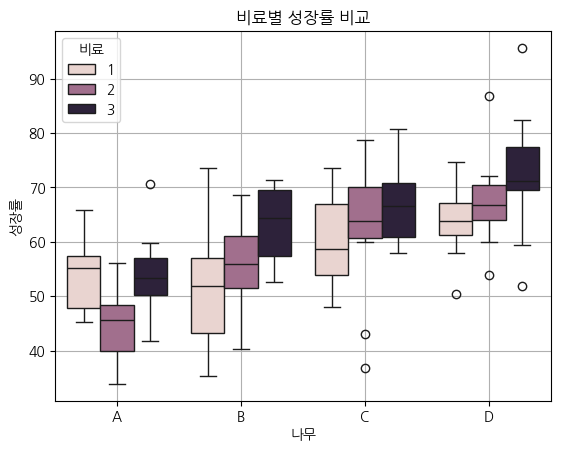

In [8]:
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

sns.boxplot(x='나무', y='성장률', hue='비료', data=tree)
plt.title("비료별 성장률 비교")
plt.grid()
plt.show()

In [10]:
import scipy.stats as stats

# 정규성 검정 (Shapiro-Wilk 검정)
print("각 그룹별 정규성 검정 결과")
grouped = tree.groupby(['나무', '비료'])

for name, group in grouped:
    stat, p = stats.shapiro(group['성장률'])
    print(f"그룹 {name}: Shapiro-Wilk 통계량 = {stat:.3f}, p-값 = {p:.3f}")
    if p > 0.05:
        print("  → 정규성을 만족합니다.")
    else:
        print("  → 정규성을 만족하지 않습니다.")

각 그룹별 정규성 검정 결과
그룹 ('A', 1): Shapiro-Wilk 통계량 = 0.908, p-값 = 0.265
  → 정규성을 만족합니다.
그룹 ('A', 2): Shapiro-Wilk 통계량 = 0.951, p-값 = 0.677
  → 정규성을 만족합니다.
그룹 ('A', 3): Shapiro-Wilk 통계량 = 0.959, p-값 = 0.772
  → 정규성을 만족합니다.
그룹 ('B', 1): Shapiro-Wilk 통계량 = 0.967, p-값 = 0.862
  → 정규성을 만족합니다.
그룹 ('B', 2): Shapiro-Wilk 통계량 = 0.969, p-값 = 0.886
  → 정규성을 만족합니다.
그룹 ('B', 3): Shapiro-Wilk 통계량 = 0.904, p-값 = 0.241
  → 정규성을 만족합니다.
그룹 ('C', 1): Shapiro-Wilk 통계량 = 0.953, p-값 = 0.708
  → 정규성을 만족합니다.
그룹 ('C', 2): Shapiro-Wilk 통계량 = 0.897, p-값 = 0.204
  → 정규성을 만족합니다.
그룹 ('C', 3): Shapiro-Wilk 통계량 = 0.927, p-값 = 0.418
  → 정규성을 만족합니다.
그룹 ('D', 1): Shapiro-Wilk 통계량 = 0.968, p-값 = 0.867
  → 정규성을 만족합니다.
그룹 ('D', 2): Shapiro-Wilk 통계량 = 0.926, p-값 = 0.412
  → 정규성을 만족합니다.
그룹 ('D', 3): Shapiro-Wilk 통계량 = 0.959, p-값 = 0.776
  → 정규성을 만족합니다.


In [11]:
# 등분산성 검정 (Levene 검정)
groups = [group['성장률'].values for name, group in grouped]
stat_levene, p_levene = stats.levene(*groups)
print("Levene 검정 결과")
print(f"Levene 통계량 = {stat_levene:.3f}, p-값 = {p_levene:.3f}")
if p_levene > 0.05:
    print("→ 각 그룹의 분산이 동일하다고 볼 수 있습니다.")
else:
    print("→ 등분산성이 만족되지 않습니다.")

Levene 검정 결과
Levene 통계량 = 0.630, p-값 = 0.799
→ 각 그룹의 분산이 동일하다고 볼 수 있습니다.


In [13]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 범주형 변수은 반드시 C() 를 사용.
model = ols('성장률 ~ C(나무) + C(비료) + C(나무):C(비료)', data=tree).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

# 나무 요인이 성장률에 통계적으로 유의한 영향을 미친다는 강력한 증거.
# 비료 요인 역시 성장률에 유의미한 영향을 미친다고 추론.
# 나무와 비료의 상호작용 효과는 통계적으로 유의하지 않습니다. 즉, 비료의 효과가 나무의 종류에 따라 달라지지 않는다고 볼 수 있습니다.

                df       sum_sq      mean_sq          F        PR(>F)
C(나무)          3.0  4783.353938  1594.451313  18.855528  6.600012e-10
C(비료)          2.0  1127.924259   563.962129   6.669256  1.857612e-03
C(나무):C(비료)    6.0   717.520672   119.586779   1.414199  2.157357e-01
Residual     108.0  9132.639448    84.561476        NaN           NaN


In [41]:
model = ols('성장률 ~ C(나무) * C(비료)', data=tree).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(나무),3.0,4783.353938,1594.451313,18.855528,6.600012e-10
C(비료),2.0,1127.924259,563.962129,6.669256,1.857612e-03
C(나무):C(비료),6.0,717.520672,119.586779,1.414199,2.157357e-01
Residual,108.0,9132.639448,84.561476,NaN,NaN


In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 사후 분석 (예: 식이 요법의 주 효과에 대해 Tukey HSD 검정)
tukey = pairwise_tukeyhsd(endog=tree['성장률'], groups=tree['나무'], alpha=0.05)
print("Tukey HSD 사후 분석 결과 (나무)")
print(tukey)

# Tukey HSD 사후 분석을 통해 나무의 각 그룹(예: A, B, C, D) 간 평균 차이를 비교한 것
# 해석: (예시)p-값이 0.05보다 크고, 신뢰구간에 0이 포함되므로, 그룹 A와 B 사이의 평균 차이는 통계적으로 유의하지 않습니다.

Tukey HSD 사후 분석 결과 (나무)
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   5.6698 0.1143 -0.8776 12.2173  False
     A      C  12.0103    0.0  5.4628 18.5578   True
     A      D   16.679    0.0 10.1315 23.2264   True
     B      C   6.3405 0.0614  -0.207 12.8879  False
     B      D  11.0091 0.0002  4.4616 17.5566   True
     C      D   4.6686 0.2517 -1.8788 11.2161  False
----------------------------------------------------


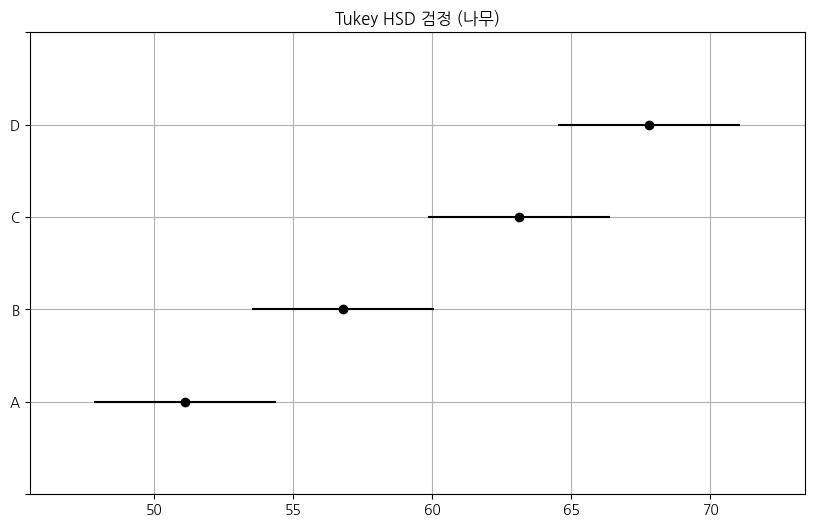

In [21]:
tukey.plot_simultaneous()
plt.title("Tukey HSD 검정 (나무)")
plt.grid()
plt.show() # 평균 차이 그림.

## 연습문제
한 연구자가 체중 감량에 미치는 두 가지 요인의 효과를 조사하고자 하였습니다.

```
요인 1: 식이 요법 (Diet)
    - 수준: 고단백 (HighProtein), 저탄수화물 (LowCarb), 균형 잡힌 식단 (Balanced)

요인 2: 운동 강도 (Exercise)
    - 수준: 낮음 (Low), 높음 (High)
```

주효과와 상호작용 효과를 포함하는 이원 분산 분석 모형을 구축하세요. (유의수준 0.05)

In [23]:
df = pd.read_csv("식이요법과 운동강도.csv")
df.head()

,Diet,Exercise,WeightLoss
0,HighProtein,Low,3.0
1,HighProtein,Low,3.5
2,HighProtein,Low,3.1
3,HighProtein,Low,3.3
4,HighProtein,Low,3.2


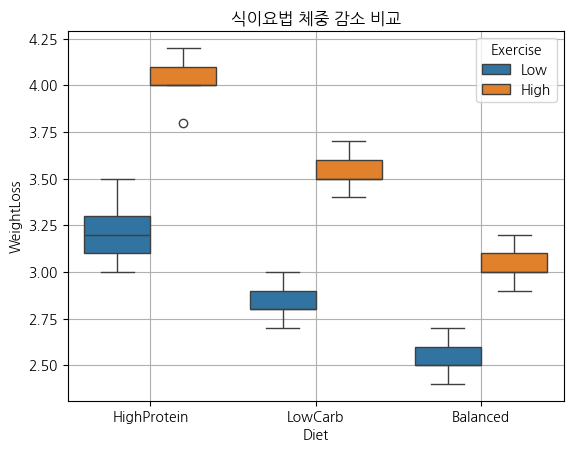

In [25]:
sns.boxplot(x='Diet', y='WeightLoss', hue='Exercise', data=df)
plt.title("식이요법 체중 감소 비교")
plt.grid()
plt.show()

In [28]:
# 정규성 검정 (Shapiro-Wilk 검정)
print("각 그룹별 정규성 검정 결과")
grouped = df.groupby(['Diet', 'Exercise'])

for name, group in grouped:
    stat, p = stats.shapiro(group['WeightLoss'])
    print(f"그룹 {name}: Shapiro-Wilk 통계량 = {stat:.3f}, p-값 = {p:.3f}")
    if p > 0.05:
        print("  → 정규성을 만족합니다.")
    else:
        print("  → 정규성을 만족하지 않습니다.")

각 그룹별 정규성 검정 결과
그룹 ('Balanced', 'High'): Shapiro-Wilk 통계량 = 0.961, p-값 = 0.814
  → 정규성을 만족합니다.
그룹 ('Balanced', 'Low'): Shapiro-Wilk 통계량 = 0.961, p-값 = 0.814
  → 정규성을 만족합니다.
그룹 ('HighProtein', 'High'): Shapiro-Wilk 통계량 = 0.956, p-값 = 0.777
  → 정규성을 만족합니다.
그룹 ('HighProtein', 'Low'): Shapiro-Wilk 통계량 = 0.979, p-값 = 0.928
  → 정규성을 만족합니다.
그룹 ('LowCarb', 'High'): Shapiro-Wilk 통계량 = 0.961, p-값 = 0.814
  → 정규성을 만족합니다.
그룹 ('LowCarb', 'Low'): Shapiro-Wilk 통계량 = 0.961, p-값 = 0.814
  → 정규성을 만족합니다.


In [29]:
# 등분산성 검정 (Levene 검정)
groups = [group['WeightLoss'].values for name, group in grouped]
stat_levene, p_levene = stats.levene(*groups)
print("Levene 검정 결과")
print(f"Levene 통계량 = {stat_levene:.3f}, p-값 = {p_levene:.3f}")
if p_levene > 0.05:
    print("→ 각 그룹의 분산이 동일하다고 볼 수 있습니다.")
else:
    print("→ 등분산성이 만족되지 않습니다.")

Levene 검정 결과
Levene 통계량 = 0.345, p-값 = 0.880
→ 각 그룹의 분산이 동일하다고 볼 수 있습니다.


In [34]:
model = ols('WeightLoss ~ C(Diet) * C(Exercise)', data=df).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Diet),2.0,3.446000,1.723000,93.135135,4.888779e-12
C(Exercise),1.0,3.333333,3.333333,180.180180,1.187511e-12
C(Diet):C(Exercise),2.0,0.116667,0.058333,3.153153,6.083294e-02
Residual,24.0,0.444000,0.018500,NaN,NaN


In [40]:
tukey = pairwise_tukeyhsd(endog=df['WeightLoss'], groups=df['Diet'], alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
   Balanced HighProtein     0.83 0.0001  0.4089  1.2511   True
   Balanced     LowCarb      0.4  0.065 -0.0211  0.8211  False
HighProtein     LowCarb    -0.43 0.0446 -0.8511 -0.0089   True
--------------------------------------------------------------


In [39]:
tukey = pairwise_tukeyhsd(endog=df['WeightLoss'], groups=df['Exercise'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -0.6667   0.0 -0.9496 -0.3837   True
---------------------------------------------------
